In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from os import walk
#import re
from scipy.signal import savgol_filter
from scipy.signal import find_peaks, find_peaks_cwt, detrend
from scipy import signal

import traceback
import sys

#import matplotlib.gridspec as gridspec
#import matplotlib.style
#import matplotlib as mpl
#mpl.style.use('default')

from Methods.Methods import * # collection of processing methods in _Methods directory

In [2]:
def calculate_regression_line_stress_strain(Strain,Stress):
        #x = Strain, y = Stress_N_msquared
        #y = self.data['Stress_N_msquared'].values
        #x = self.data['Strain'].values

        #solve LLS Optimization problem min ||y - Phi*Theta||_2^2, Phi being [[1, x_0]^T,...,[1,x_N]^T]T
        Phi = np.array([np.ones(len(Strain)),Strain.values]).T
        Theta = np.linalg.inv(Phi.T @ Phi)@Phi.T @ Stress
        return Theta
    
def calculate_phase_shift(x,y):
    corr = np.correlate(x,y)
    return 

In [3]:
#obtain all sample names and respective paths in given directory
data_dir = r'D:\02_RESEARCH\08_Dynamic Mechanical Analysis\Messungen\Neuer Ordner\CSV'
dic = getFileContent(data_dir)

d = {}
df_rupture = {}
for key in dic.keys():
    if not (dic[key].endswith('4.CSV') or dic[key].endswith('3.CSV')):
    
        value = dic[key]
        d[key] = value
    if dic[key].endswith('4.CSV'):
        value = dic[key]
        df_rupture[key] = value
    #dic = [s.split('.')[0] for s in dic.keys()]
dic = d

In [4]:
#load geometry data from excel file
geometries = pd.read_excel(r'D:\02_RESEARCH\08_Dynamic Mechanical Analysis\Messungen\Neuer Ordner\DMA_BoseRolauffs_2020-12-22.xlsx',sheet_name='Geometrie')

#only keep data for cyclical experiments
geometries = geometries[geometries.zyklisch == 'x']
geometries = geometries[geometries.kept == 'x']
geometries.Probe = geometries.Probe.astype('Int32').astype('str')  
geometries['gel'] = geometries.Protein.str.replace('-','').str.lstrip('V')+'-'+geometries.Probe
geometries['Geldicke'] = 0.580

#only keep necessary columns
df_geometries = geometries[['gel','Gelbreite','Geldicke','Spaltbreite']]

In [5]:
names = ['Points','Elapsed_Time','Scan_Time','Disp','Load','E12_%','E22_%','Axial_cmd_V','Axial_err_%','Unnamed']

water1 = pd.read_csv(r'D:\\02_RESEARCH\\08_Dynamic Mechanical Analysis\\Messungen\\Neuer Ordner\\CSV\\Wasser1.1.CSV', header = 1000, names=names,index_col=False)
water1.Disp = water1.Disp*0.001
water1['Load_sav'] = savgol_filter(water1.Load,21,1)
water1['Load_sav_det'] = detrend(water1.Load_sav)

water2 = pd.read_csv(r'D:\\02_RESEARCH\\08_Dynamic Mechanical Analysis\\Messungen\\Neuer Ordner\\CSV\\Wasser1.2.CSV', header = 1000, names=names,index_col=False)
water2.Disp = water2.Disp*0.001
water2['Load_sav'] = savgol_filter(water2.Load,11,1)
water2['Load_sav_det'] = detrend(water2.Load_sav)  

water1_offset, theta_water_1 = calculate_regression_line_stress_strain(Strain=water1.Disp,Stress=water1.Load_sav_det)
water2_offset, theta_water_2 = calculate_regression_line_stress_strain(Strain=water2.Disp,Stress=water2.Load_sav_det)

#print(theta_water_1, theta_water_2)

c:\users\alexander resch\appdata\local\programs\python\python36\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


c:\users\alexander resch\appdata\local\programs\python\python36\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
c:\users\alexander resch\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\alexander resch\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


Error
File:  D:\02_RESEARCH\08_Dynamic Mechanical Analysis\Messungen\Neuer Ordner\CSV\20-5.4tdf.CSV
Traceback (most recent call last):
  File "<ipython-input-6-b27a668b0ba8>", line 73, in <module>
    offset, theta_temp = calculate_regression_line_stress_strain(Strain=tmp.Disp,Stress=tmp.Load_sav_det)
  File "<ipython-input-2-f63abbf70523>", line 8, in calculate_regression_line_stress_strain
    Theta = np.linalg.inv(Phi.T @ Phi)@Phi.T @ Stress
  File "<__array_function__ internals>", line 6, in inv
  File "c:\users\alexander resch\appdata\local\programs\python\python36\lib\site-packages\numpy\linalg\linalg.py", line 546, in inv
    ainv = _umath_linalg.inv(a, signature=signature, extobj=extobj)
  File "c:\users\alexander resch\appdata\local\programs\python\python36\lib\site-packages\numpy\linalg\linalg.py", line 88, in _raise_linalgerror_singular
    raise LinAlgError("Singular matrix")
numpy.linalg.LinAlgError: Singular matrix

Error
File:  D:\02_RESEARCH\08_Dynamic Mechanical Analys

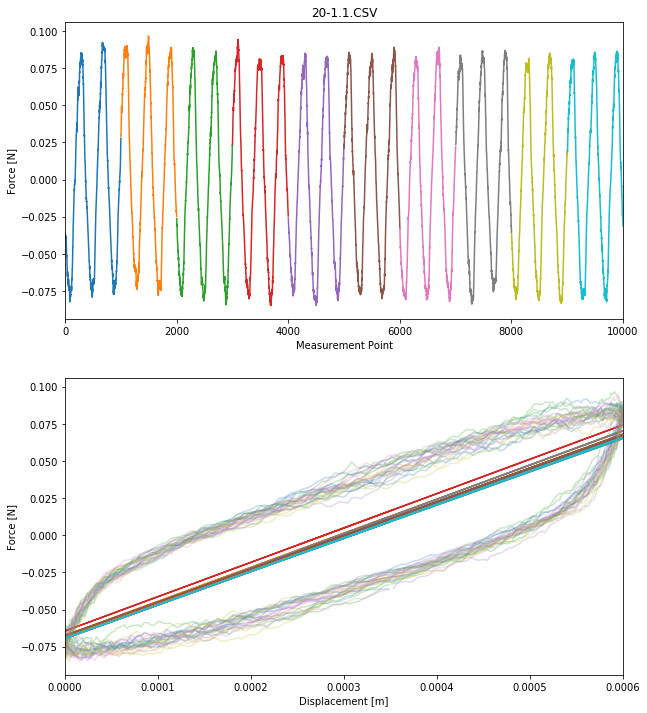

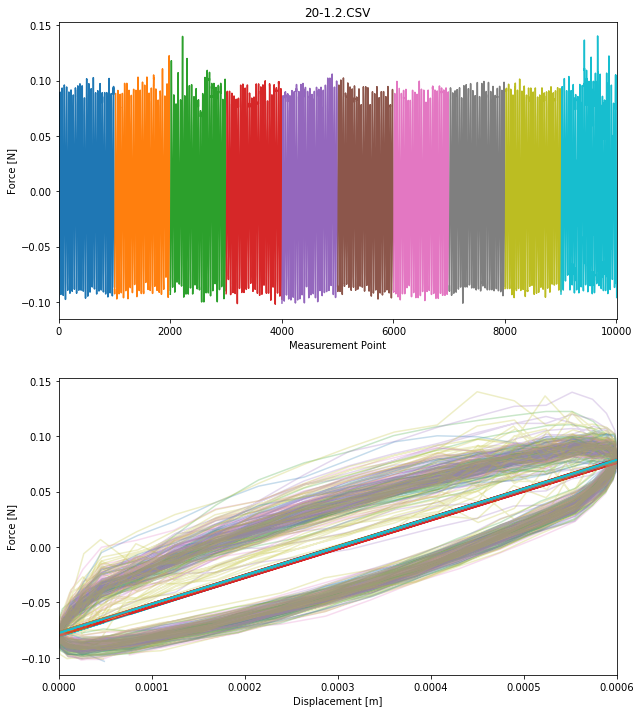

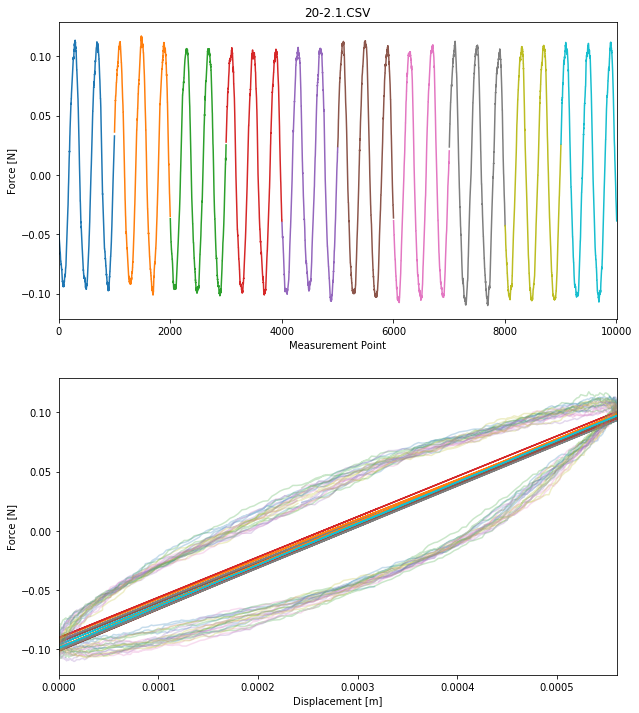

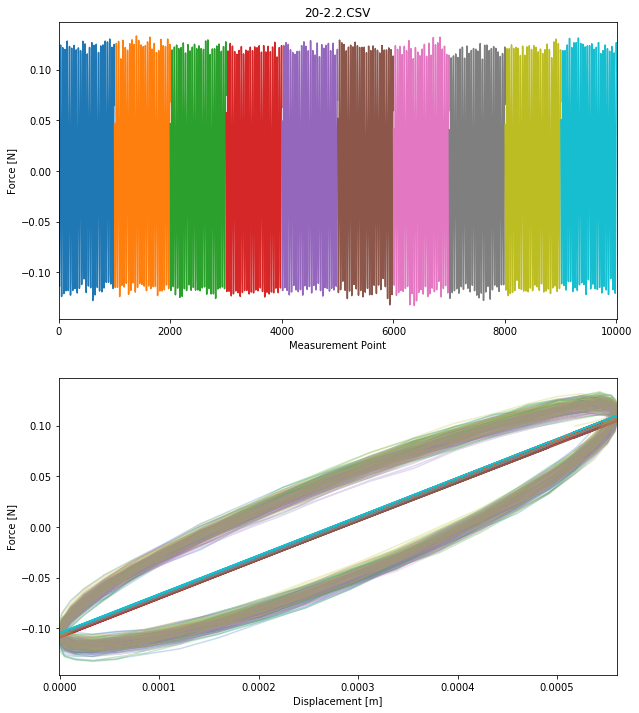

In [6]:
#from matplotlib import interactive
#%matplotlib notebook 

list_thetas = []
list_thetas_corrected = []


activate_plot = True
dic_thetas = {} 

no_of_samples_to_print = 4
k = 0
for sample in dic.keys(): 
    
    try:
        #get path from sample dictionary
        path = dic[sample]
        
        header = 2500

        #print(sample)
        #load data into dataframe
        df = pd.read_csv(path,header=header,names=names,index_col=False)
        df['source'] = 'source'

        #drop duplicate row
        df = df.drop_duplicates(subset='Elapsed_Time',keep='first')

        #create walking continuous index
        df.Points = [i for i in range(1, len(df) + 1)]

        #keep 10000 points
        df = df[:10000]

        #convert displacement into meters
        df.Disp = 0.001*df.Disp

        #smoothen data 
        #if frequency == 1Hz ,   use 11 samples to smoothen data
        #if frequence == 0.1Hz, use 21 samples to smoothen data
        #else smoothen with 15 samples
        if sample.endswith('1.CSV'):
            df['Load_sav'] = savgol_filter(df.Load,21,1)

        elif sample.endswith('2.CSV'):
            df['Load_sav'] = savgol_filter(df.Load,11,1)

        else:
            df['Load_sav'] = savgol_filter(df.Load,15,1)


        #detrend data
        df['Load_sav_det'] = detrend(df.Load_sav)

        split_up_data = []
        thetas = []
        thetas_corrected = []
        
        
        if activate_plot:
                
            f = plt.figure(figsize=(10,12))
            ax = f.add_subplot(2,1,1)
            ax1 = f.add_subplot(2,1,2)
            #ax2 = f.add_subplot(3,1,3)
            #plt.title(sample)
            
        
        for i in range(10):
            tmp = df[i*1000:(i+1)*1000]

            #calculate youngs modulus
            offset, theta_temp = calculate_regression_line_stress_strain(Strain=tmp.Disp,Stress=tmp.Load_sav_det)

            #correct for effects of water on measured force
            #don't correct the water plots
            if sample.startswith('Wasser1'):
                theta_corrected = theta_temp
                
            elif sample.endswith('1.CSV'):
                theta_corrected = theta_temp-theta_water_1
            
            elif sample.endswith('2.CSV') :
                theta_corrected = theta_temp-theta_water_2
            
                
            
            if activate_plot:
                
                #tmp.Load.plot(ax=ax,alpha=0.25,legend=False,title=sample)
                tmp.Load_sav_det.plot(ax=ax,legend=False,title=sample)
                
                ax.set_xlabel("Measurement Point")
                ax.set_ylabel("Force [N]")
                
                ##plot ellipses
                tmp.plot(x='Disp',y='Load_sav_det',ax=ax1,alpha=0.25,legend=False)
                
                ax1.set_xlabel("Displacement [m]")
                ax1.set_ylabel("Force [N]")
                
                #plot youngs modulus
                x = tmp.Disp.values
                Phi = np.array([np.ones(len(x)),x]).T
                y = Phi@[offset, theta_temp]
                ax1.plot(x,y)
                
                
            
            tmp['theta'] = theta_temp
            tmp['theta_corrected'] = theta_corrected

            #split_up_data.append(tmp)
            
            thetas.append(theta_temp)
            thetas_corrected.append(theta_corrected)
        
        dic_thetas[sample] = thetas_corrected
        
        #if activate_plot:
        #    ax2.bar(np.arange(len(thetas)),thetas)
            
        '''
        print('sample raw: {}'.format(sample))
        print('E: max: {:.3f}, min: {:.3f}, mean: {:.3f}, std: {:.6f}'.format(np.max(thetas),
                                                                              np.min(thetas),
                                                                              np.mean(thetas),
                                                                              np.std(thetas)))
        print()
        print('sample corrected: {}'.format(sample))
        print('E: max: {:.3f}, min: {:.3f}, mean: {:.3f}, std: {:.6f}'.format(np.max(thetas_corrected),
                                                                              np.min(thetas_corrected),
                                                                              np.mean(thetas_corrected),
                                                                              np.std(thetas_corrected)))
        
        print()
        print()
        print()
        '''
        
        list_thetas.append([path,
                            np.max(thetas),
                            np.max(thetas_corrected),
                            np.min(thetas),
                            np.min(thetas_corrected),
                            np.mean(thetas),
                            np.mean(thetas_corrected),
                            np.std(thetas),
                            np.std(thetas_corrected),
                            sample, 
                            sample.split('.')[0]])

    except Exception as err:
        print('Error')
        print('File: ', dic[sample])
        print(traceback.format_exc())
    
    #this will reduce the number of plotted figures
    k+=1
    if k>=no_of_samples_to_print:
        activate_plot = False

        

df_youngs = pd.DataFrame(list_thetas, columns=['Path',
                                               'theta_Maximum',
                                               'theta_Maximum_corrected',
                                               'theta_Minimum',
                                               'theta_Minimum_corrected',
                                               'theta_Mean',
                                               'theta_Mean_corrected',
                                               'theta_Std',
                                               'theta_Std_corrected',
                                               'sample',
                                               'gel'])



df_full = pd.merge(df_youngs,df_geometries,how='outer',on='gel')

#transform linear coefficient theta into youngs modulus
df_full['E_Maximum'] = df_full.theta_Maximum*df_full.Spaltbreite*0.001/(df_full.Geldicke*0.001 * df_full.Gelbreite*0.001)
df_full['E_Maximum_corrected'] = df_full.theta_Maximum_corrected*df_full.Spaltbreite*0.001/(df_full.Geldicke*0.001 * df_full.Gelbreite*0.001)

df_full['E_Minimum'] = df_full.theta_Minimum*df_full.Spaltbreite*0.001/(df_full.Geldicke*0.001 * df_full.Gelbreite*0.001)
df_full['E_Minimum_corrected'] = df_full.theta_Minimum_corrected*df_full.Spaltbreite*0.001/(df_full.Geldicke*0.001 * df_full.Gelbreite*0.001)

df_full['E_Mean'] = df_full.theta_Mean*df_full.Spaltbreite*0.001/(df_full.Geldicke*0.001 * df_full.Gelbreite*0.001)
df_full['E_Mean_corrected'] = df_full.theta_Mean_corrected*df_full.Spaltbreite*0.001/(df_full.Geldicke*0.001 * df_full.Gelbreite*0.001)

df_full['E_Std'] = df_full.theta_Std*df_full.Spaltbreite*0.001/(df_full.Geldicke*0.001 * df_full.Gelbreite*0.001)
df_full['E_Std_corrected'] = df_full.theta_Std_corrected*df_full.Spaltbreite*0.001/(df_full.Geldicke*0.001 * df_full.Gelbreite*0.001)

df_full = df_full[['gel',
                   'sample',
                   'E_Maximum',
                   'E_Maximum_corrected',
                   'E_Minimum',
                   'E_Minimum_corrected',
                   'E_Mean',
                   'E_Mean_corrected',
                   'E_Std',
                   'E_Std_corrected']]
#calculate effect of water on youngs modulus in terms of gel


In [11]:
df_full = df_full.round(2)
df_full.to_csv('youngs_moduli_korrigiert.csv',index=False,sep=';',decimal=',')

In [ ]:
#these are the manually extracted points of rupture in the data. from those the strain and stress can be calculated 
Points_of_rupture = [682,3200,3715,3715,3515,3615,3240,3060,3080,3250,4773,3677,3822,3200,3990,3560,
3685,3950,3070,2991,2990,3157,3325,3420,3306,311]

list_of_ruptures = []
k=0
for sample in df_rupture.keys(): 
    
    try:
        #get path from sample dictionary
        path = df_rupture[sample]
        header = 10

        #print(sample)
        #load data into dataframe
        df = pd.read_csv(path,header=header,names=names,index_col=False)
        #df['source'] = 'source'

        #drop duplicate row
        df = df.drop_duplicates(subset='Elapsed_Time',keep='first')

        #create walking continuous index
        df.Points = [i for i in range(1, len(df) + 1)]

        #keep 10000 points
        #df = df[:10000]

        #convert displacement into meters
        df.Disp = 0.001*df.Disp
        
        #smoothen data
        df['Load_sav'] = savgol_filter(df.Load,15,1)
        
        '''
        force_at_rupture = df.Load_sav[df.Points == Points_of_rupture[k]]
        displacement_at_rupture = df.Disp[df.Points == Points_of_rupture[k]]
        
        list_of_ruptures.append([path,
                                 force_at_rupture,
                                 displacement_at_rupture,
                                 sample, 
                                 sample.split('.')[0]])

        '''
        
        print(sample)
        f = plt.figure(figsize=(10,6))
        ax1 = f.add_subplot(1,2,1)
        ax2 = f.add_subplot(1,2,2)
        df.plot(x='Points',y=['Load','Load_sav'],ax=ax1)
        df.plot(x='Points',y=['Disp'],ax=ax2)
        
    
    except Exception as err:
        
        print('Error')
        print('File: ', dic[sample])
        print(traceback.format_exc())
    #iterate through rupture point data    
    k+=1
    
df_r = pd.DataFrame(list_of_ruptures, columns=['Path',
                                               'Force',
                                               'Disp',
                                               'sample',
                                               'gel'])        

In [59]:
#here we calculate the slope of the different thetas to determine 
#whether fatigue could be measured between different subgroups of the same gel

from scipy import stats

def linReg(x, y):
    '''linear regression using numpy starting from two one dimensional numpy arrays'''
    A = np.vstack([x, np.ones(len(x))]).T
    slope, intercept = np.linalg.lstsq(A, y, rcond=None)[0]
    return pd.Series({'slope':slope, 'intercept': intercept})

df = pd.DataFrame()

gel = []
theta_sub = []
lst = []
for sample in dic_thetas.keys():
    lst += [sample]*len(dic_thetas[sample])
    gel += [sample.split('.')[0]]*len(dic_thetas[sample])
    theta_sub += dic_thetas[sample]
    
df['sample'] = lst    
df['gel'] = gel
df['theta_sub'] = theta_sub

df = pd.merge(df,df_geometries,how='inner',on='gel')
df['E_sub'] = df.theta_sub*df.Spaltbreite*0.001/(df.Geldicke*0.001 * df.Gelbreite*0.001)

#check whether mean values align with values obtained above -- all good so far!
#print(df.groupby('sample').mean())
df = df[['sample','E_sub']]

#print(df)
#df.groupby('sample').apply(lambda x: stats.linregress([i for i in range(len(x))],x).slope)
res = df.groupby('sample').apply(lambda x: linReg([i for i in range(len(x.E_sub))], x.E_sub))
res

,slope,intercept
sample,,
20-1.1.CSV,-1.136851e+03,262328.544108
20-1.2.CSV,-8.172116e+02,302127.270203
20-2.1.CSV,3.126693e+03,442741.723438
20-2.2.CSV,-4.996546e+02,512426.842389
20-3.1.CSV,2.399110e+03,349236.840686
20-3.2.CSV,1.106600e+03,386501.436579
20-4.1.CSV,-5.041301e+02,156495.184939
20-4.2.CSV,-5.472580e+02,139682.272289
20-6.1.CSV,-1.244832e+03,115956.751224
